# Regresión Lineal con scikit-learn y statsmodels  

In [1]:
# importamos las librerías 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# leemos el csv, con parse_date le indicamos las columnas de tipo datetime y con dtype el tipo de las demas columnas
data= pd.read_csv("Consumo_cerveza.csv",parse_dates=['Fecha'],dtype={'Temperatura_Media':float, 'Temperatura_Minima':float,
       'Temperatura_Maxima':float, 'Precipitac':float, 'Fin_de_Semana':float,
       'Consumo_de_cerveza':float})

In [3]:
data.shape

(365, 7)

In [4]:
data.head()

,Fecha,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitac,Fin_de_Semana,Consumo_de_cerveza
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [5]:
#  no hay nulos en los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               365 non-null    datetime64[ns]
 1   Temperatura_Media   365 non-null    float64       
 2   Temperatura_Minima  365 non-null    float64       
 3   Temperatura_Maxima  365 non-null    float64       
 4   Precipitac          365 non-null    float64       
 5   Fin_de_Semana       365 non-null    float64       
 6   Consumo_de_cerveza  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.1 KB


In [6]:
data.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitac,Fin_de_Semana,Consumo_de_cerveza
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [7]:
data.isna().sum()

Fecha                 0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitac            0
Fin_de_Semana         0
Consumo_de_cerveza    0
dtype: int64

In [8]:
# vemos la correlacion entre variables
data.corr()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitac,Fin_de_Semana,Consumo_de_cerveza
Temperatura_Media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura_Minima,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura_Maxima,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitac,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Fin_de_Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo_de_cerveza,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


# Visualizaciones
Para ver si el consumo de cerveza aumenta los fines de semana podemos hacer un violin plot. Primero pasamos la columna Fin de Semana como una variable categorica

In [9]:
def finde(x):
    if x == 0:
        return 'Dia_de_Semana'
    else:
        return 'Fin_de_Semana'

In [10]:
# Pasamos la columna a una variable categórica y la guardamos a una nueva variable. 
# Se utiliza el método apply que aplica una función a cada fila de la serie .
data['dia_semana'] = data.Fin_de_Semana.apply(finde)

Text(0, 0.5, 'Consumo de cerveza')

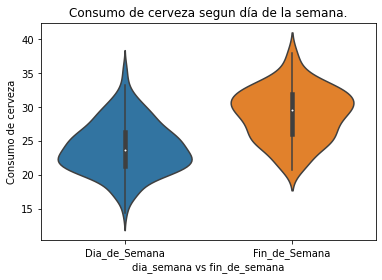

In [11]:
# violin plot del consumo de cerveza segun el día de la semana 
sns.violinplot(x="dia_semana", y="Consumo_de_cerveza",data=data)
plt.title("Consumo de cerveza segun día de la semana.")
plt.xlabel('dia_semana vs fin_de_semana')
plt.ylabel("Consumo de cerveza")

Para ver como varia el consumo de cerveza en cada mes, se hace un box plot agrupando por mes

In [12]:
# no quedamos con el nombre del mes de cada fila de la columna fecha y se guarda en una nueva columna
data["mes"] = data["Fecha"].dt.month_name()
data["mes"]

0       January
1       January
2       January
3       January
4       January
         ...   
360    December
361    December
362    December
363    December
364    December
Name: mes, Length: 365, dtype: object

<AxesSubplot:xlabel='mes', ylabel='Consumo_de_cerveza'>

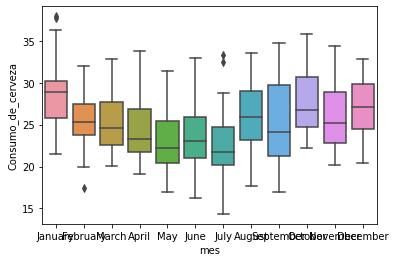

In [13]:
# se grafica el box plot por mes
sns.boxplot(x="mes", y="Consumo_de_cerveza",data=data)

Hacemos un heatmap para ver la correlación entre las variables. Nos va servir para ver que variables podemos agregar al modelo

<AxesSubplot:>

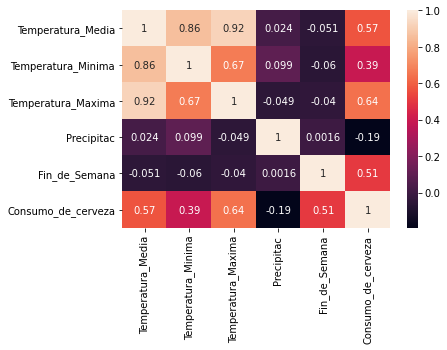

In [14]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

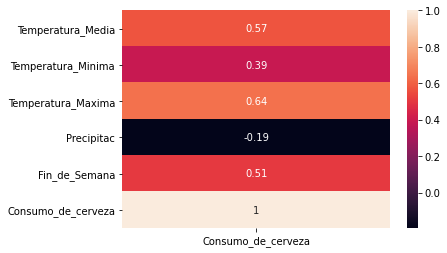

In [15]:
# heatmap con la columna de consumo de cerveza solamente
sns.heatmap(data.corr().loc[:,['Consumo_de_cerveza']],annot=True)

Scatter plot con la temperatura media y el consumo de cerveza. Nos va servir para ver si hay algun a correlación entre estas variables

<AxesSubplot:xlabel='Temperatura_Media', ylabel='Consumo_de_cerveza'>

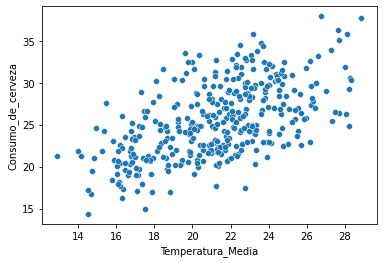

In [16]:
sns.scatterplot(x= data.Temperatura_Media, y= data.Consumo_de_cerveza)

Con seaborn podemos usar la función lmplot para graficar una regresión lineal entre dos variables en el mismo scatterplot

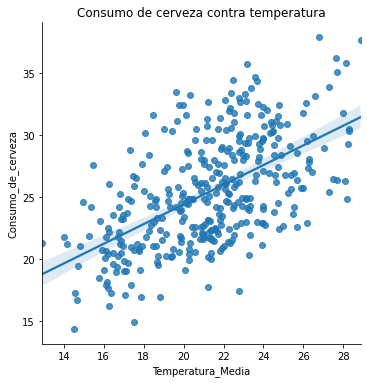

In [17]:
sns.lmplot(x="Temperatura_Media", y="Consumo_de_cerveza", data=data)
plt.title("Consumo de cerveza contra temperatura")
plt.show()

# Modelo
Generamos la regresión lineal simple entre la temperatura y el consumo de cerveza 

In [18]:
from sklearn.linear_model import LinearRegression 

Primero separamos los datos en las features en la variable X y nuestro target en la variable y

In [19]:
X = data[["Temperatura_Media"]]
y = data["Consumo_de_cerveza"]

Instanciamos el modelo

In [20]:
model = LinearRegression()

Entrenamos el modelo con el método fit

In [21]:
model.fit(X,y)

LinearRegression()

Vemos el coeficiente de la regresión que se calculo

In [22]:
model.coef_

array([0.79488254])

Hacemos la predicción de nuestros datos

In [23]:
prediccion = model.predict(X)

Podemos probar poniendo otro dato. Ir viendo como a medida que cambia la temperatura también lo hace el consumo de cerveza

In [24]:
model.predict(np.array([[22]]))

array([26.0163231])

Vemos el R2 de la regresión

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y, prediccion)

0.3301820493324321

El modelo explica un 41% de la variabilidad de nuestro target 

Comparamos el regplot que hace seaborn con nuestra regresión

<AxesSubplot:xlabel='Temperatura_Media', ylabel='Consumo_de_cerveza'>

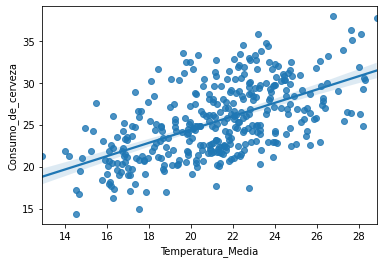

In [27]:
sns.regplot(x="Temperatura_Media",y="Consumo_de_cerveza",data=data)

<AxesSubplot:xlabel='Temperatura_Media', ylabel='Consumo_de_cerveza'>

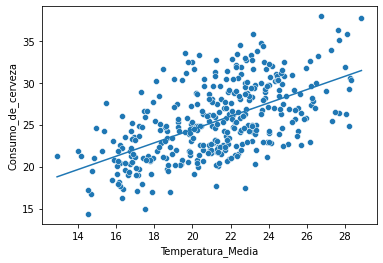

In [28]:
# graficamos un scatterplot y luego un lineplot con la recta calculada
sns.scatterplot(x="Temperatura_Media",y="Consumo_de_cerveza",data=data)
sns.lineplot(x= X.Temperatura_Media ,y = prediccion)

### Regresión lineal con statsmodels

In [29]:
import statsmodels.api as sm

Con statsmodels cuando se instancia el modelo hay que pasarle los datos y luego hacer el fit para entrenar. Con el método summary podemos diferentes resultados que nos van a ser de mucha ayuda

In [30]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Consumo_de_cerveza   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          1.630e+04
Date:                Wed, 28 Jul 2021   Prob (F-statistic):                   2.54e-304
Time:                        14:41:51   Log-Likelihood:                         -1006.2
No. Observations:                 365   AIC:                                      2014.
Df Residuals:                     364   BIC:                                      2018.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Temperatura_Media     1.1879      0.009    127.653      0.000       1.170       1.206
==============================================================================
Omnibus:                        4.240   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.685
Skew:                           0.165   Prob(JB):                        0.158
Kurtosis:                       2.634   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En scikit learn el intercepto de la regresión se agrega de forma automatica, en statsmodels hay que agregarlo a los datos

In [31]:
#  se agrega una constante para que sirve de intercepto
X_sm = sm.add_constant(X)
X_sm

,const,Temperatura_Media
0,1.0,27.30
1,1.0,27.02
2,1.0,24.82
3,1.0,23.98
4,1.0,23.82
...,...,...
360,1.0,24.00
361,1.0,22.64
362,1.0,21.68
363,1.0,21.38


In [32]:
# se corre el modelo de nuevo
modelo_constante = sm.OLS(y,X_sm).fit()
modelo_constante.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Consumo_de_cerveza   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.87e-33
Time:                        14:41:51   Log-Likelihood:                -984.99
No. Observations:                 365   AIC:                             1974.
Df Residuals:                     363   BIC:                             1982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.5289      1.275      6.687      0.000       6.021      11.037
Temperatura_Media     0.7949      0.059     13.377      0.000       0.678       0.912
==============================================================================
Omnibus:                       11.300   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.673
Skew:                           0.324   Prob(JB):                      0.00793
Kurtosis:                       2.534   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si quieren estudiar lo que brinda el método summary de statsmodel:
* https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

### Ejercicios
Hacer los ejercicios en scikit-learn y statsmodels:
1. Dado el heatmap calculado, evalua que otras variables se pueden agregar al modelo. Intenta entrenar el modelo con más variables, evalua los coeficientes, p-value y el r2 de la regresión
2. Genera un array de números aleatorios con la misma cantidad de filas que tu data frame y agregalo como una nueva columna.  Agrega al modelo esta feature y evalua que pasa con su coeficiente, su p-value, el R2 y el R2 ajustado.